In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('dataset.csv')

In [2]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261.0,1.0,-1.0,0.0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151.0,1.0,-1.0,0.0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76.0,1.0,-1.0,0.0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92.0,1.0,-1.0,0.0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198.0,1.0,-1.0,0.0,unknown,no



## **1. Data Cleansing**


Lakukan pembersihan data, sesuai yang diajarkan di kelas, seperti: </br>
A. Handle missing values </br>
B. Handle duplicated data </br>
C. Handle outliers </br>
D. Feature transformation </br>
E. Feature encoding </br>
F. Handle class imbalance </br>
</br>
Di laporan homework, tuliskan apa saja yang telah dilakukan dan metode yang digunakan. * Tetap tuliskan jika memang ada tidak yang perlu di-handle (contoh: “Tidak perlu feature encoding karena semua feature sudah numerical” atau “Outlier tidak di-handle karena akan fokus menggunakan model yang robust terhadap outlier”).

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45663 entries, 0 to 45662
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45663 non-null  int64  
 1   job        45663 non-null  object 
 2   marital    45663 non-null  object 
 3   education  45663 non-null  object 
 4   default    45663 non-null  object 
 5   balance    45663 non-null  int64  
 6   housing    45663 non-null  object 
 7   loan       45663 non-null  object 
 8   contact    45663 non-null  object 
 9   day        45663 non-null  int64  
 10  month      45663 non-null  object 
 11  duration   45317 non-null  float64
 12  campaign   45281 non-null  float64
 13  pdays      45446 non-null  float64
 14  previous   45395 non-null  float64
 15  poutcome   45663 non-null  object 
 16  y          45355 non-null  object 
dtypes: float64(4), int64(3), object(10)
memory usage: 5.9+ MB


In [4]:
# Memisahkan kolom numerikal dan kategorikal

cats = []
nums = []

for i, x in enumerate(df.dtypes.tolist()):
    if x == 'object':
        cats.append(df.columns[i]),
    if x == 'bool':
        cats.append(df.columns[i]),
    if x == 'float64':
        nums.append(df.columns[i])
    elif x == 'int64':
        nums.append(df.columns[i])

print('kategorikal =', cats)
print('numerikal =', nums)
print("Jumlah fitur kategorikal:", len(cats))
print("Jumlah fitur numerik:", len(nums))

kategorikal = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
numerikal = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Jumlah fitur kategorikal: 10
Jumlah fitur numerik: 7


In [5]:
data_missing_value = df.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value

,feature,missing_value
0,age,0
1,job,0
2,marital,0
3,education,0
4,default,0
5,balance,0
6,housing,0
7,loan,0
8,contact,0
9,day,0


#### A. Handle missing values

In [6]:
# Drop Missing Values
df.dropna(subset=['duration','campaign','pdays','previous','poutcome','y'],inplace=True)

In [7]:
data_missing_value = df.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value

,feature,missing_value
0,age,0
1,job,0
2,marital,0
3,education,0
4,default,0
5,balance,0
6,housing,0
7,loan,0
8,contact,0
9,day,0


Setelah melakukan analisis terhadap dataset bank, kami memutuskan untuk menghapus baris data yang kosong karena persentase baris kosong tersebut kurang dari 1%. Dengan menghapus baris-baris yang kosong, kami dapat mempertahankan sebagian besar informasi yang ada dalam dataset tanpa mengorbankan jumlah sampel yang signifikan. Pendekatan ini memungkinkan kami untuk melanjutkan analisis dengan dataset yang lebih lengkap dan representatif, yang diharapkan dapat menghasilkan hasil yang lebih akurat dan reliable dalam konteks analisis yang dilakukan terkait dengan data bank tersebut.

#### B. Handle duplicated data

In [8]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
45658     True
45659     True
45660     True
45661     True
45662     True
Length: 44162, dtype: bool

In [9]:
df.duplicated(subset=['age','job','balance','loan','campaign','y']).sum()

2877

In [10]:
df.drop_duplicates(subset=['age','job','balance','loan','campaign','y'], keep='first', inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41285 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        41285 non-null  int64  
 1   job        41285 non-null  object 
 2   marital    41285 non-null  object 
 3   education  41285 non-null  object 
 4   default    41285 non-null  object 
 5   balance    41285 non-null  int64  
 6   housing    41285 non-null  object 
 7   loan       41285 non-null  object 
 8   contact    41285 non-null  object 
 9   day        41285 non-null  int64  
 10  month      41285 non-null  object 
 11  duration   41285 non-null  float64
 12  campaign   41285 non-null  float64
 13  pdays      41285 non-null  float64
 14  previous   41285 non-null  float64
 15  poutcome   41285 non-null  object 
 16  y          41285 non-null  object 
dtypes: float64(4), int64(3), object(10)
memory usage: 5.7+ MB


In [12]:
df.duplicated().sum()

0

Dalam mengelola dataset bank, kami telah melakukan penghapusan data duplikat dengan menggunakan subset kolom 'age', 'job', 'balance', 'loan', 'campaign', dan 'y'. Dengan melakukan penghapusan ini, kami memastikan bahwa setiap entri dalam dataset hanya mewakili satu observasi unik yang tidak memiliki duplikat dengan kombinasi nilai pada kolom-kolom yang disebutkan. Setelah dilakukan drop duplicated dan handle missing value, data yang semula berjumlah 45663 menjadi 41285.

#### C. Handle outliers

Berdasarkan analisis dataset Bank tersebut, kami tidak perlu menghapus outlier karena nilai-nilai yang ekstrem masih masuk akal atau dapat dijelaskan secara beralasan. Hal ini menunjukkan bahwa dataset tersebut mengandung variasi yang wajar dan tidak ada observasi yang secara signifikan melenceng dari pola umum yang terlihat. Oleh karena itu, outlier-outlier yang ada dalam dataset bank dapat dianggap sebagai bagian yang sah dari variasi data dan tidak perlu dihapus dalam proses analisis.

#### D. Feature Transformation

##### Fitur balance -> log transformation

<Axes: xlabel='balance', ylabel='Density'>

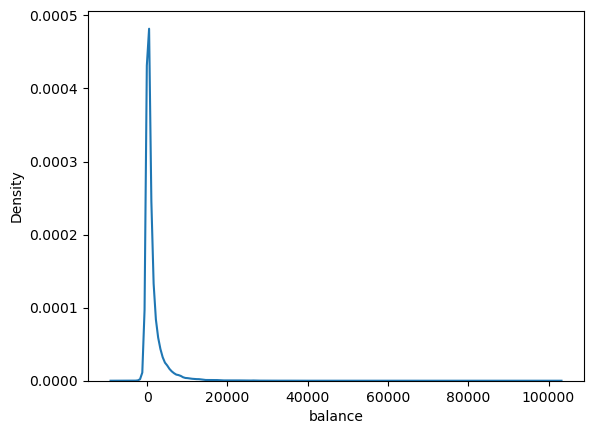

In [13]:
# distribusi balance (nilai asli)
sns.kdeplot(df['balance'])

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='balance', ylabel='Density'>

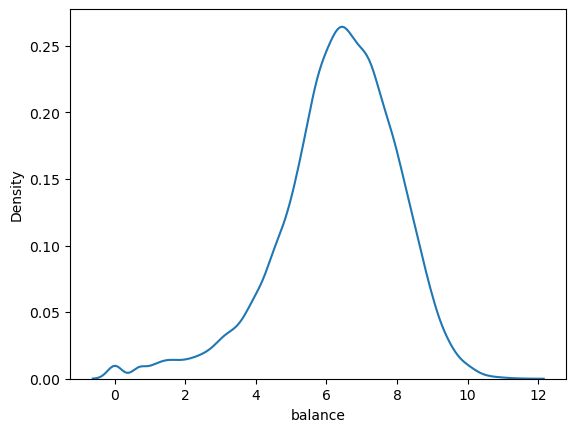

In [14]:
# distribusi balance (setelah log transformation)
sns.kdeplot(np.log(df['balance']))

In [15]:
# log transformation
df['log_balance'] = np.log(df['balance'])

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


##### Fitur duration -> log transformation

<Axes: xlabel='duration', ylabel='Density'>

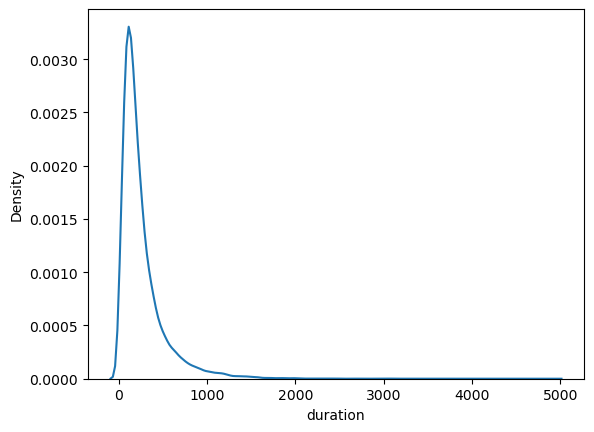

In [16]:
# distribusi duration (nilai asli)
sns.kdeplot(df['duration'])

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='duration', ylabel='Density'>

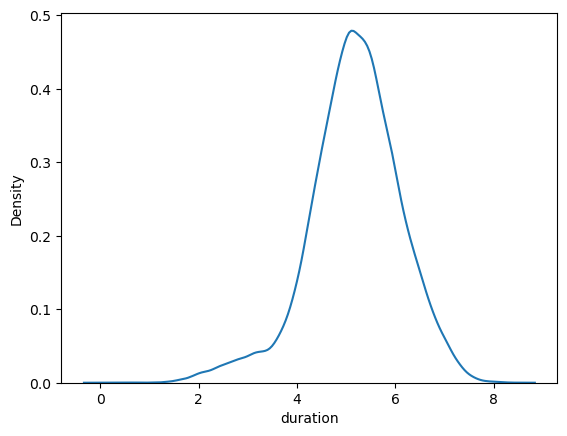

In [17]:
# distribusi duration (setelah log transformation)
sns.kdeplot(np.log(df['duration']))

In [18]:
# log transformation
df['log_duration'] = np.log(df['duration'])

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


##### Fitur campaign -> log transformation

<Axes: xlabel='campaign', ylabel='Density'>

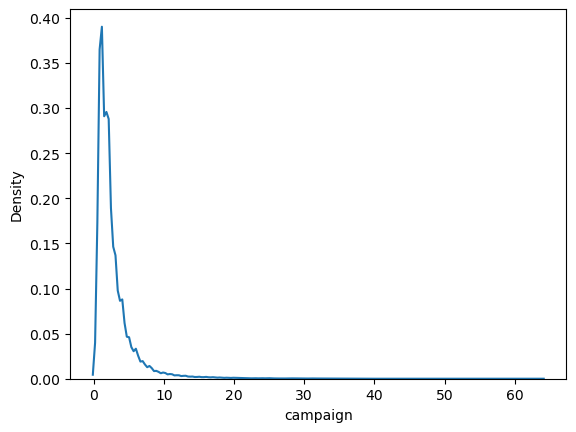

In [19]:
# distribusi campaign (nilai asli)
sns.kdeplot(df['campaign'])

<Axes: xlabel='campaign', ylabel='Density'>

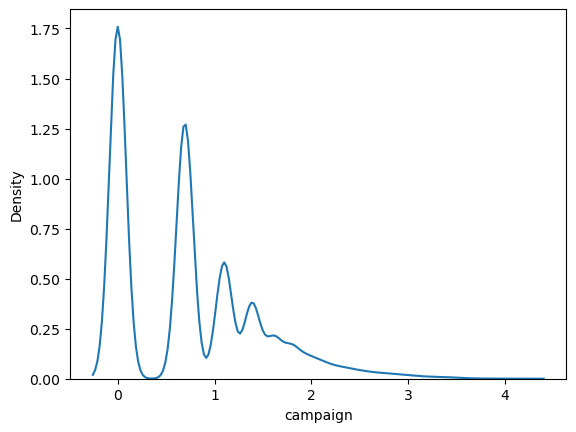

In [20]:
# distribusi campaign (setelah log transformation)
sns.kdeplot(np.log(df['campaign']))

In [21]:
# log transformation
df['log_campaign'] = np.log(df['campaign'])

##### Fitur previous -> log transformation

<Axes: xlabel='previous', ylabel='Density'>

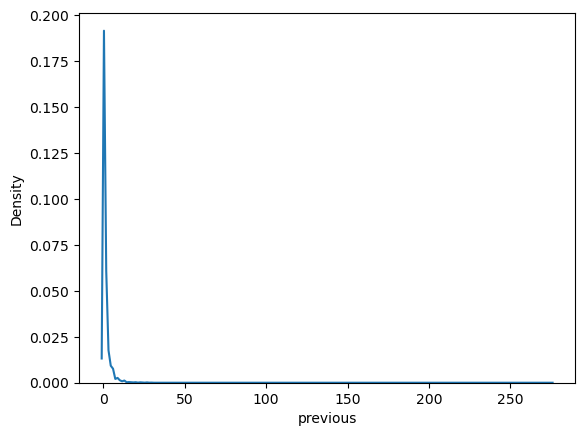

In [22]:
# distribusi campaign (nilai asli)
sns.kdeplot(df['previous'])

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='previous', ylabel='Density'>

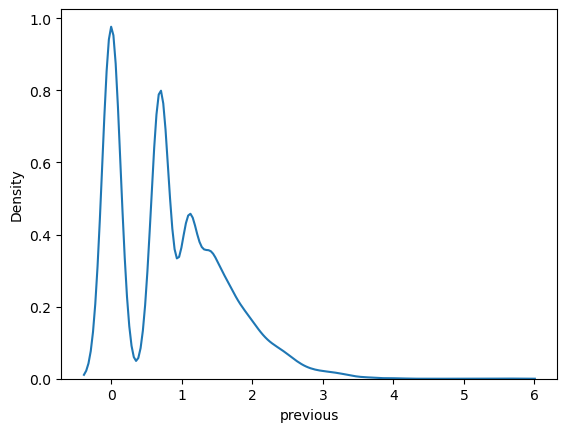

In [23]:
# distribusi previous (setelah log transformation)
sns.kdeplot(np.log(df['previous']))

In [24]:
# log transformation
df['log_previous'] = np.log(df['previous'])

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Berdasarkan hasil visualisasi, diketahui bahwa fitur balance, duration, campaign dan previous menunjukan distribusi positively skewed sehingga dilakukan log transformation agar distribusi fitur tersebut semakin mendekati distribusi normal

#### E. Features Encoding

In [25]:
# Melakukan label Encoding pada feature default
df['default'] = df['default'].map({'yes': 1, 'no': 0})

In [26]:
# Melakukan label Encoding pada feature housing
df['housing'] = df['housing'].map({'yes': 1, 'no': 0})

In [27]:
# Melakukan label Encoding pada feature loan
df['loan'] = df['loan'].map({'yes': 1, 'no': 0})

In [28]:
# Melakukan label Encoding pada feature Marital
df['marital'] = df['marital'].map({
    'single': 0, 
    'married': 1,
    'divorced' : 2,
    'unknown' : 3

})

In [29]:
# Melakukan label Encoding pada feature Education
df['education'] = df['education'].map({
    'primary': 0, 
    'secondary': 1,
    'tertiary' : 2,
    'unknown' : 3

})

In [30]:
# Melakukan label Encoding pada feature Education
df['month'] = df['month'].map({
    'jan' : 1,
    'feb' : 2,
    'mar' : 3,
    'apr' : 4,
    'may' : 5,
    'jun' : 6,
    'jul' : 7,
    'aug' : 8,
    'sep' : 9,
    'oct' : 10,
    'nov' : 11,
    'dec' : 12

})

In [31]:
# Melakukan label Encoding pada feature y
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41285 entries, 0 to 45210
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           41285 non-null  int64  
 1   job           41285 non-null  object 
 2   marital       41285 non-null  int64  
 3   education     41285 non-null  int64  
 4   default       41285 non-null  int64  
 5   balance       41285 non-null  int64  
 6   housing       41285 non-null  int64  
 7   loan          41285 non-null  int64  
 8   contact       41285 non-null  object 
 9   day           41285 non-null  int64  
 10  month         41285 non-null  int64  
 11  duration      41285 non-null  float64
 12  campaign      41285 non-null  float64
 13  pdays         41285 non-null  float64
 14  previous      41285 non-null  float64
 15  poutcome      41285 non-null  object 
 16  y             41285 non-null  int64  
 17  log_balance   37664 non-null  float64
 18  log_duration  41285 non-null  f

In [33]:
# Melakukan one-hot encoding
df_encoded = pd.get_dummies(df['job'], prefix='job')
df_encoded

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,True,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,False,False,True,False,False
45207,False,False,False,False,False,True,False,False,False,False,False,False
45208,False,False,False,False,False,True,False,False,False,False,False,False
45209,False,True,False,False,False,False,False,False,False,False,False,False


In [34]:
# mengubah tipe data pada data yang telah dilakukan one-hot encoding
df_encoded = df_encoded.astype(int)

In [35]:
# Menggabungkan df_encoded dengan dataframe
df = pd.concat([df, df_encoded], axis=1)

In [36]:
df = df.drop(columns=['job_unknown'])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41285 entries, 0 to 45210
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                41285 non-null  int64  
 1   job                41285 non-null  object 
 2   marital            41285 non-null  int64  
 3   education          41285 non-null  int64  
 4   default            41285 non-null  int64  
 5   balance            41285 non-null  int64  
 6   housing            41285 non-null  int64  
 7   loan               41285 non-null  int64  
 8   contact            41285 non-null  object 
 9   day                41285 non-null  int64  
 10  month              41285 non-null  int64  
 11  duration           41285 non-null  float64
 12  campaign           41285 non-null  float64
 13  pdays              41285 non-null  float64
 14  previous           41285 non-null  float64
 15  poutcome           41285 non-null  object 
 16  y                  41285 no

#### F. Handle Class Imbalance

In [38]:
kate = []
nume = []

for i, x in enumerate(df.dtypes):
    if x == 'object':
        kate.append(df.columns[i])
    elif x == 'float64':
        kate.append(df.columns[i])
    elif x == 'int32':
        kate.append(df.columns[i])
    elif x == 'int64':
        nume.append(df.columns[i])

print('kategorikal =', kate)
print('numerikal =', nume)
print("Jumlah fitur kategorikal:", len(kate))
print("Jumlah fitur numerik:", len(nume))


kategorikal = ['job', 'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'log_balance', 'log_duration', 'log_campaign', 'log_previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed']
numerikal = ['age', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'day', 'month', 'y']
Jumlah fitur kategorikal: 22
Jumlah fitur numerik: 10


In [39]:
df[nume].corr()

,age,marital,education,default,balance,housing,loan,day,month,y
age,1.000000,0.404716,-0.107542,-0.018968,0.097822,-0.188023,-0.017203,-0.011156,0.095528,0.021048
marital,0.404716,1.000000,-0.109580,0.004069,-0.000478,0.013773,0.047447,0.006349,0.052296,-0.042289
education,-0.107542,-0.109580,1.000000,-0.007950,0.068792,-0.091079,-0.045880,0.023490,0.055715,0.064494
default,-0.018968,0.004069,-0.007950,1.000000,-0.068491,-0.005095,0.078099,0.009833,0.011889,-0.021273
balance,0.097822,-0.000478,0.068792,-0.068491,1.000000,-0.072618,-0.090697,0.005832,0.101331,0.046850
housing,-0.188023,0.013773,-0.091079,-0.005095,-0.072618,1.000000,0.037072,-0.023719,-0.174524,-0.134067
loan,-0.017203,0.047447,-0.045880,0.078099,-0.090697,0.037072,1.000000,0.012271,0.026626,-0.068249
day,-0.011156,0.006349,0.023490,0.009833,0.005832,-0.023719,0.012271,1.000000,0.102020,-0.029560
month,0.095528,0.052296,0.055715,0.011889,0.101331,-0.174524,0.026626,0.102020,1.000000,0.019852
y,0.021048,-0.042289,0.064494,-0.021273,0.046850,-0.134067,-0.068249,-0.029560,0.019852,1.000000


<Axes: >

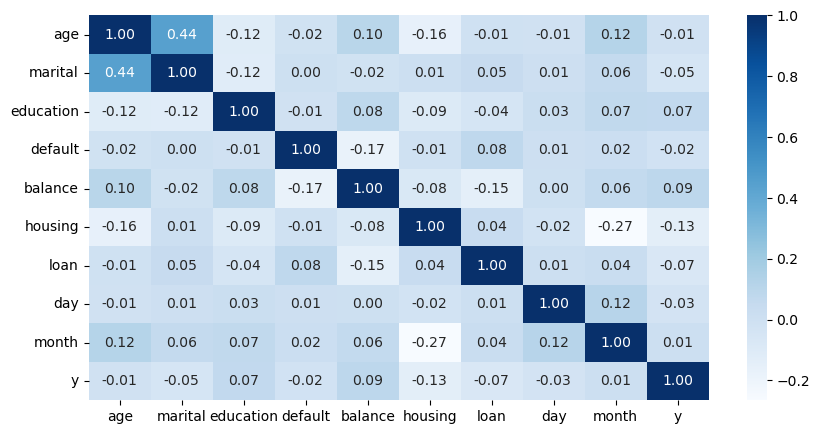

In [40]:
plt.figure(figsize=(10, 5))
sns.heatmap(df[nume].corr(method='spearman'), cmap='Blues', annot=True, fmt='.2f')

In [41]:
X = df[['balance', 'housing']] # mengambil feature yang memiliki korelasi lebih signifikan dengan target
y = df['y'] # feature target

# Membagi data menjadi data train dan data test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

print(X.shape)
print(y.shape)

(41285, 2)
(41285,)


In [42]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

#class imbalance pada data awal
print(y_train.value_counts())

#inisialisasi Oversampling (SMOTE)
smote = SMOTE(random_state=42)

#menerapkan Oversampling (SMOTE)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#cek jumlah sample setelah SMOTE
print(y_train_smote.value_counts())

#inisialisasi undersampling (RandomUnderSampler)
under_sampler = RandomUnderSampler(random_state=42)

#menerapkan undersampling
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)

#cek jumlah sample setelah undersampling
print(y_train_under.value_counts())

y
0    25578
1     3321
Name: count, dtype: int64
y
0    25578
1    25578
Name: count, dtype: int64
y
0    3321
1    3321
Name: count, dtype: int64


## Feature Engineering

### Feature Selection

In [115]:
print('Total Kategori: ', len(kate))
print('Total Numerikal: ', len(nume))

Total Kategori:  25
Total Numerikal:  10


#### Korelasi

<Axes: >

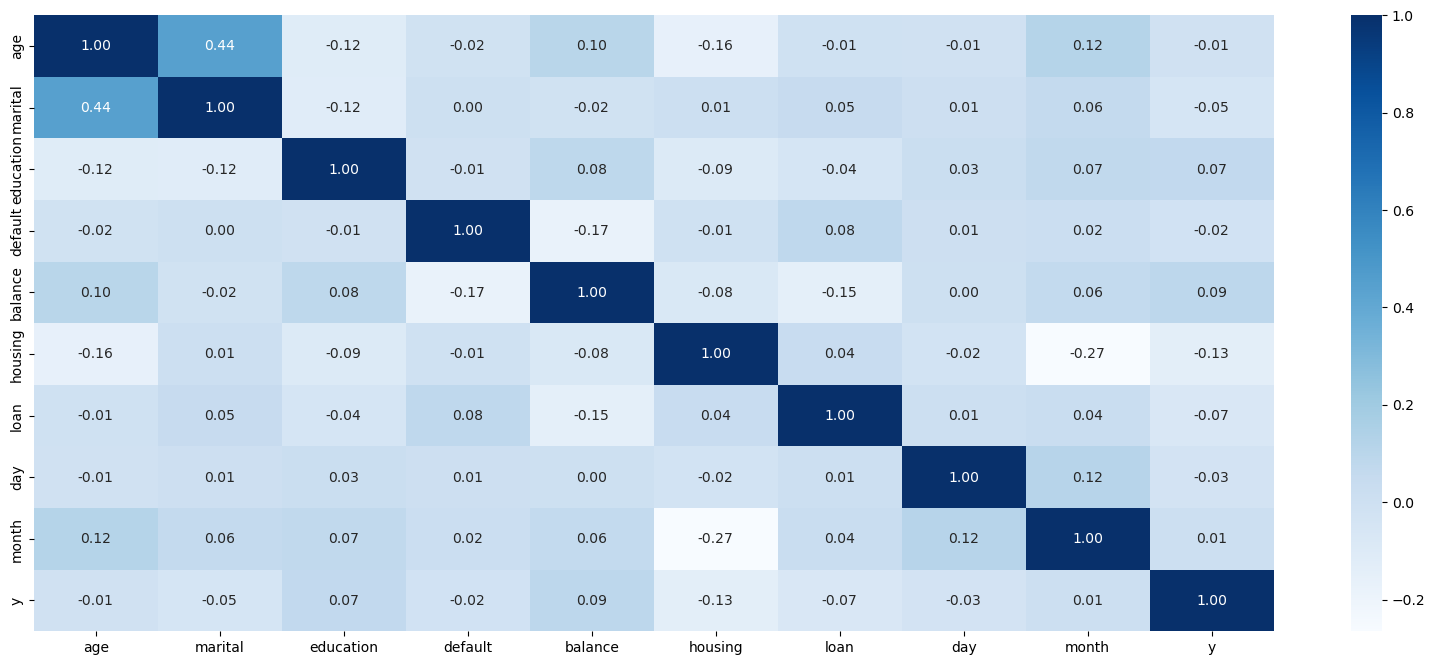

In [112]:
plt.figure(figsize=(20, 8))
sns.heatmap(df[nume].corr(method='spearman'), cmap='Blues', annot=True, fmt='.2f')

#### Random Forest

In [106]:
from sklearn.ensemble import RandomForestClassifier

# Membuat model Random Forest
rf = RandomForestClassifier()

# Melatih model pada data train
rf.fit(X_train, y_train)

# Mendapatkan skor pentingnya setiap fitur
feature_importances = rf.feature_importances_

# Membuat DataFrame untuk memudahkan visualisasi
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Menampilkan fitur-fitur dengan tingkat penting tertinggi
selected_features_rf = feature_importances_df.sort_values(by='Importance', ascending=False).head(35)['Feature'].values

print("Fitur terpenting yang dipilih berdasarkan Feature Importance dari Random Forest:")
print(selected_features_rf)

Fitur terpenting yang dipilih berdasarkan Feature Importance dari Random Forest:
['balance' 'age' 'day' 'month' 'education' 'housing' 'loan' 'default']


#### Kesimpulan Feature Selection

**Feature Selection**<br>

Pada feature selection ini dilakukan untuk menentukan feature terbaik yang akan digunakan untuk modelling, didapat 2 kesimpulan:
1. Korelasi: fitur `marital` memiliki korelasi cenderung kuat dengan `age` yang diduga akan menyebabkan multikoliearitas sehingga harus dibuang salah satu. Pada kasus ini fitur `marital` yang dibuang karena dari lini bisnis fitur `age` sudah merepresentasikan tingkat nasabah deposito
2. Random Forest: cara ini digunakan untuk menentukan fitur terbaik untuk modelling sehingga didapatkan fitur terbaik yaitu `balance`, `age`, `day`, `month`, `education`, `housing`, `loan`, `default`
3. Feature `pdays` juga harus dihapus dikarenakan memiliki nilai negatif sehingga akan mengganggu modelling

In [118]:
# Drop feature
# Drop feature
df = df.drop(columns=['marital', 'pdays'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41285 entries, 0 to 45210
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     41285 non-null  int64  
 1   job                     41285 non-null  object 
 2   education               41285 non-null  int64  
 3   default                 41285 non-null  int64  
 4   balance                 41285 non-null  int64  
 5   housing                 41285 non-null  int64  
 6   loan                    41285 non-null  int64  
 7   contact                 41285 non-null  object 
 8   day                     41285 non-null  int64  
 9   month                   41285 non-null  int64  
 10  duration                41285 non-null  float64
 11  campaign                41285 non-null  float64
 12  previous                41285 non-null  float64
 13  poutcome                41285 non-null  object 
 14  y                       41285 non-null  int

### Feature Extraction

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41285 entries, 0 to 45210
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                41285 non-null  int64  
 1   job                41285 non-null  object 
 2   marital            41285 non-null  int64  
 3   education          41285 non-null  int64  
 4   default            41285 non-null  int64  
 5   balance            41285 non-null  int64  
 6   housing            41285 non-null  int64  
 7   loan               41285 non-null  int64  
 8   contact            41285 non-null  object 
 9   day                41285 non-null  int64  
 10  month              41285 non-null  int64  
 11  duration           41285 non-null  float64
 12  campaign           41285 non-null  float64
 13  pdays              41285 non-null  float64
 14  previous           41285 non-null  float64
 15  poutcome           41285 non-null  object 
 16  y                  41285 no

In [45]:
# Menghitung rasio balance terhadap durasi
df['balance_duration_ratio'] = df['balance'] / df['duration']

In [46]:
# Membuat kategori usia
bins = [0, 20, 40, 60, np.inf]
labels = ['teenager', 'young adult', 'adult', 'elderly']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

df['age_group'] = df['age_group'].astype('object')

In [47]:
# Membuat fitur baru untuk menghitung jumlah kontak per hari
df['contacts_per_day'] = df['campaign'] / df['day']

1. Rasio Balance Terhadap Durasi: Rasio saldo terhadap durasi memberikan perbandingan antara seberapa besar saldo rekening pelanggan dibandingkan dengan durasi kontak yang dilakukan. Jika rasio ini tinggi, dapat menunjukkan bahwa pelanggan dengan saldo yang tinggi cenderung lebih mungkin memberikan tanggapan atau merespons kampanye.
2. Usia Tersegmentasi: Segmentasi usia ini dapat membantu meningkatkan interpretasi model dan juga memungkinkan model untuk mengenali pola atau tren yang spesifik untuk kelompok usia tertentu.
3. Kontak per Hari : dapat mengidentifikasi berapa banyak kontak yang optimal dilakukan dalam satu hari untuk mencapai tujuan tertentu tanpa menyebabkan kelelahan atau kejenuhan pada pelanggan.

#### F. Handle Class Imbalance

melakukan handle class imbalance setelah dilakukan feature extraction

In [48]:
kate = []
nume = []

for i, x in enumerate(df.dtypes):
    if x == 'object':
        kate.append(df.columns[i])
    elif x == 'float64':
        kate.append(df.columns[i])
    elif x == 'int32':
        kate.append(df.columns[i])
    elif x == 'int64':
        nume.append(df.columns[i])

print('kategorikal =', kate)
print('numerikal =', nume)
print("Jumlah fitur kategorikal:", len(kate))
print("Jumlah fitur numerik:", len(nume))

kategorikal = ['job', 'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'log_balance', 'log_duration', 'log_campaign', 'log_previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'balance_duration_ratio', 'age_group', 'contacts_per_day']
numerikal = ['age', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'day', 'month', 'y']
Jumlah fitur kategorikal: 25
Jumlah fitur numerik: 10


In [49]:
df[nume].corr()

,age,marital,education,default,balance,housing,loan,day,month,y
age,1.000000,0.404716,-0.107542,-0.018968,0.097822,-0.188023,-0.017203,-0.011156,0.095528,0.021048
marital,0.404716,1.000000,-0.109580,0.004069,-0.000478,0.013773,0.047447,0.006349,0.052296,-0.042289
education,-0.107542,-0.109580,1.000000,-0.007950,0.068792,-0.091079,-0.045880,0.023490,0.055715,0.064494
default,-0.018968,0.004069,-0.007950,1.000000,-0.068491,-0.005095,0.078099,0.009833,0.011889,-0.021273
balance,0.097822,-0.000478,0.068792,-0.068491,1.000000,-0.072618,-0.090697,0.005832,0.101331,0.046850
housing,-0.188023,0.013773,-0.091079,-0.005095,-0.072618,1.000000,0.037072,-0.023719,-0.174524,-0.134067
loan,-0.017203,0.047447,-0.045880,0.078099,-0.090697,0.037072,1.000000,0.012271,0.026626,-0.068249
day,-0.011156,0.006349,0.023490,0.009833,0.005832,-0.023719,0.012271,1.000000,0.102020,-0.029560
month,0.095528,0.052296,0.055715,0.011889,0.101331,-0.174524,0.026626,0.102020,1.000000,0.019852
y,0.021048,-0.042289,0.064494,-0.021273,0.046850,-0.134067,-0.068249,-0.029560,0.019852,1.000000


<Axes: >

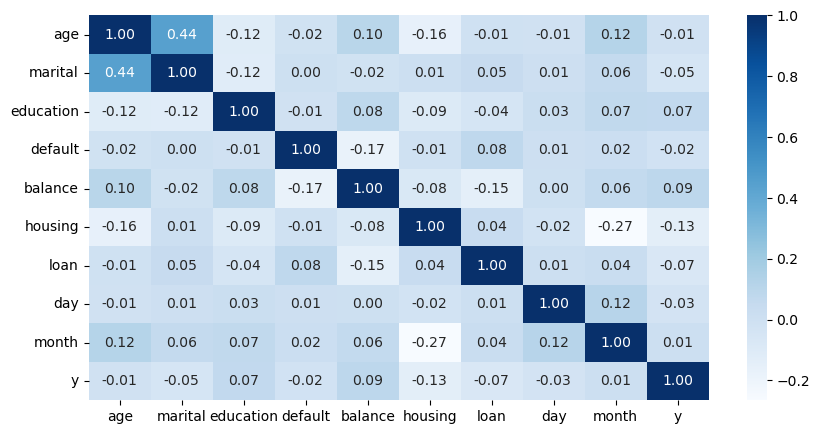

In [50]:
plt.figure(figsize=(10, 5))
sns.heatmap(df[nume].corr(method='spearman'), cmap='Blues', annot=True, fmt='.2f')

In [51]:
X = df[['balance','education','housing','loan','default','age','day','month']] # mengambil feature yang memiliki korelasi dengan target
y = df['y'] # feature target

# Membagi data menjadi data train dan data test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

print(X.shape)
print(y.shape)

(41285, 8)
(41285,)


In [52]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
#from imblearn.combine import SMOTEENN

#class imbalance pada data awal
print(y_train.value_counts())

#inisialisasi SMOTE
smote = SMOTE(random_state=42)

#menerapkan SMOTE
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#cek jumlah sample setelah SMOTE
print(y_train_smote.value_counts())

#inisialisasi Oversampling
over_sampler = RandomOverSampler(random_state=42)

#menerapkan oversampling 
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)

#cek jumlah sample setelah oversampling
print(y_train_over.value_counts())

#inisialisasi undersampling (RandomUnderSampler)
under_sampler = RandomUnderSampler(random_state=42)

#menerapkan undersampling
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)

#cek jumlah sample setelah undersampling
print(y_train_under.value_counts())

y
0    25578
1     3321
Name: count, dtype: int64
y
0    25578
1    25578
Name: count, dtype: int64
y
0    25578
1    25578
Name: count, dtype: int64
y
0    3321
1    3321
Name: count, dtype: int64


### Tuliskan 4 fitur tambahan di luar fitur yang sudah ada

•	Address
Kita dapat mengkategorikan nasabah berdasarkan alamat atau domisili. Dengan begitu, kita dapat melihat pola perilaku pembelian, apakah di suatu kota kecenderungan membeli nasabah tinggi/rendah.

•	Credit score
Fitur ini memberikan informasi apakah nasabah lancar atau tidak dalam membayar hutang. Dengan begitu, kita dapat mengetahui apakah nasabah berpotensi atau tidak membuka deposito berjangka.

•	Rata-rata saldo tahunan
Fitur ini berguna untuk mengetahui rata-rata saldo tahunan nasabah. Dengan begitu, kita dapat memetakan apakah nasabah masuk dalam kategori rata-rata low, medium, atau high. Jika masuk kategori medium/high, besar kemungkinan nasabah berpotensi untuk membuka deposito berjangka.

•	Children
Fitur anak ini berguna untuk mengetahui apakah nasabah sudah memiliki anak atau belum. 
Jumlah anak dapat memengaruhi keputusan seseorang untuk membeli sesuatu, termasuk deposito berjangka. Nasabah yang sudah memiliki anak tentu perlu mengatur keuangannya dengan bijak. Oleh karena itu fitur ini bisa menjadi faktor penting dalam memprediksi konversi.
